# Breast-Cancer-Identification-with-Machine-Learning

##### Use the load_breast_cancer() from sklearn.datasets to get a copy of the breast cancer (diagnostic) data with 569 instances and 30 numeric predictive attributes. The binary responses include 212 Malignant and 357 Benign cases. Use train_test_split to divide the data into 80% training data and 20% testing data, then perform the following machine learning tasks.

In [447]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import plot_partial_dependence as pdp

import graphviz
import pydot
import eli5
import shap
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [448]:
#Load data

seed(3035556644)

breast_cancer = load_breast_cancer()
X = breast_cancer.data[:, :30]
y = breast_cancer.target
feature_names = breast_cancer.feature_names[:30]

#Split into 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Step 1)

In [449]:
DT = DecisionTreeClassifier(criterion = "gini", max_depth=3)
DT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

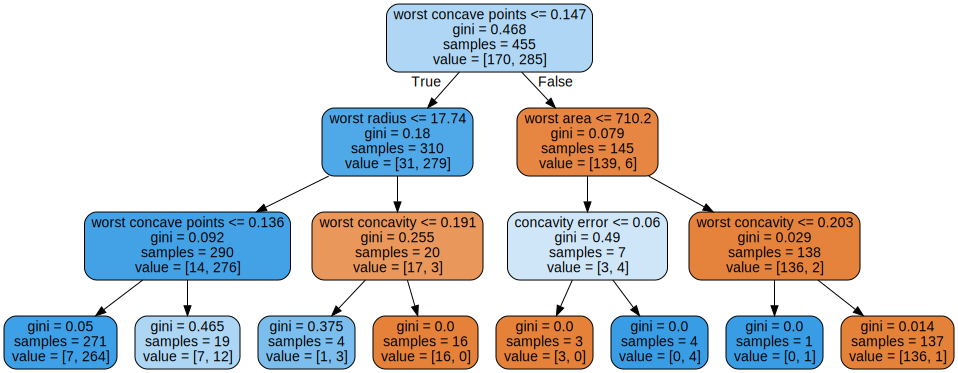

In [450]:
tree_data = export_graphviz(DT,feature_names=feature_names,rounded=True,filled=True,)
tree_graph = graphviz.Source(tree_data)
tree_graph

In [451]:
print('Training Accuracy: ', accuracy_score(y_train, DT.predict(X_train)))
print('Testing Accuracy: ', accuracy_score(y_test, DT.predict(X_test)))

Training Accuracy:  0.9648351648351648
Testing Accuracy:  0.9473684210526315


## Step 2)

Text(0, 0.5, 'Testing Accuracy')

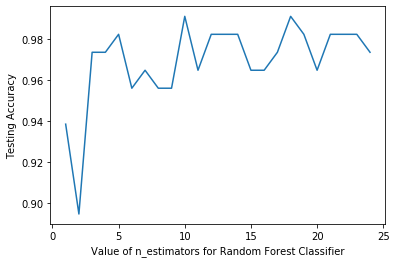

In [474]:
scoresRF =[]
for k in range(1, 25):
    rf = RandomForestClassifier(n_estimators=k)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    scoresRF.append(accuracy_score(y_test, y_pred))

import matplotlib.pyplot as plt
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(1, 25), scoresRF)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

Text(0, 0.5, 'Testing Accuracy')

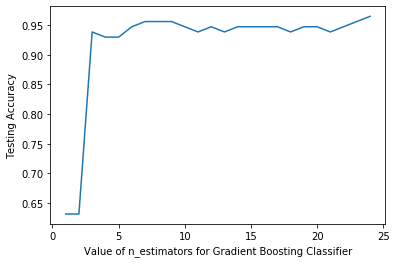

In [475]:
scoresGB =[]
for k in range(1, 25):
    gb = GradientBoostingClassifier(n_estimators=k)
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)
    scoresGB.append(accuracy_score(y_test, y_pred))

import matplotlib.pyplot as plt
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(1, 25), scoresGB)
plt.xlabel('Value of n_estimators for Gradient Boosting Classifier')
plt.ylabel('Testing Accuracy')

In [479]:
#Random Forest with n_estimators = 10
RF = RandomForestClassifier(n_estimators=10)
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [480]:
#Gradient Boost with n_estimators = 10
GB = GradientBoostingClassifier(n_estimators = 10)
GB.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=10,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [481]:
print('Random Forest Model Training Accuracy: ', accuracy_score(y_train, RF.predict(X_train)))
print('Random Forest Model Testing Accuracy: ', accuracy_score(y_test, RF.predict(X_test)))

print('Gradient Boost Model Training Accuracy: ', accuracy_score(y_train, GB.predict(X_train)))
print('Gradient Boost Model Testing Accuracy: ', accuracy_score(y_test, GB.predict(X_test)))

Random Forest Model Training Accuracy:  0.9956043956043956
Random Forest Model Testing Accuracy:  0.9824561403508771
Gradient Boost Model Training Accuracy:  0.9802197802197802
Gradient Boost Model Testing Accuracy:  0.956140350877193


## Step 3)

In [538]:
#Linear kernal
l_SV = SVC(kernel = "linear")
l_SV.fit(X_train, y_train)

#RBF kernalO
rbf_SV = SVC(kernel = "rbf", gamma = "auto")
rbf_SV.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [539]:
print('Support Vector Linear Kernel Model Training Accuracy: ', accuracy_score(y_train, l_SV.predict(X_train)))
print('Support Vector Linear Kernel Model Testing Accuracy: ', accuracy_score(y_test, l_SV.predict(X_test)))

print('Support Vector RBF Kernel Model Training Accuracy: ', accuracy_score(y_train, rbf_SV.predict(X_train)))
print('Support Vector RBF Kernel Model Testing Accuracy: ', accuracy_score(y_test, rbf_SV.predict(X_test)))

Support Vector Linear Kernel Model Training Accuracy:  0.967032967032967
Support Vector Linear Kernel Model Testing Accuracy:  0.9649122807017544
Support Vector RBF Kernel Model Training Accuracy:  1.0
Support Vector RBF Kernel Model Testing Accuracy:  0.631578947368421


## Step 4)

In [540]:
# sequentially define the model
model = Sequential()
# first hidden layer with 10 nodes
model.add(Dense(40, activation='relu', input_dim= X_train.shape[1]))
# second hidden layer with 10 nodes
model.add(Dense(40, activation='relu'))
# output layer
model.add(Dense(1, activation='sigmoid'))

In [541]:
# compile the model with Adam optimizer
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=["accuracy"])

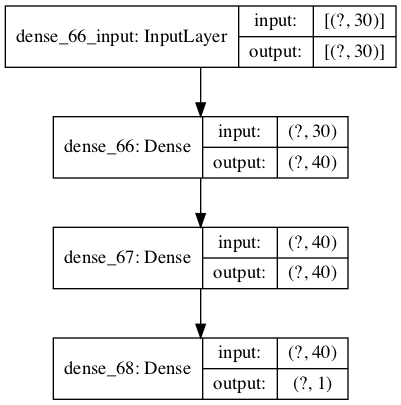

In [542]:
# visualize the model
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True, show_layer_names=True)

In [543]:
print(X_train.shape)
print(X_test.shape)

(455, 30)
(114, 30)


In [544]:
# train the model
history = model.fit(X_train, y_train, validation_data=(X_test,y_test),
                    epochs=32, batch_size=15,verbose=0)
train_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test, verbose=0)

print('Train accuracy: ', train_score[1])
print('Testing accuracy: ', test_score[1])

Train accuracy:  0.9142857
Testing accuracy:  0.9649123


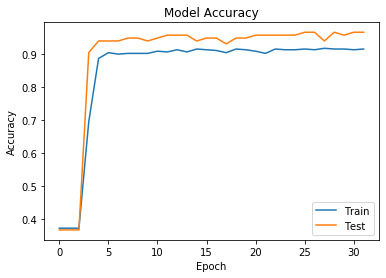

In [545]:
# plot training & testing accuracy values
plt.figure()
try:
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
except:
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

## Step 5)

### Select Random Forest Classifier Model 

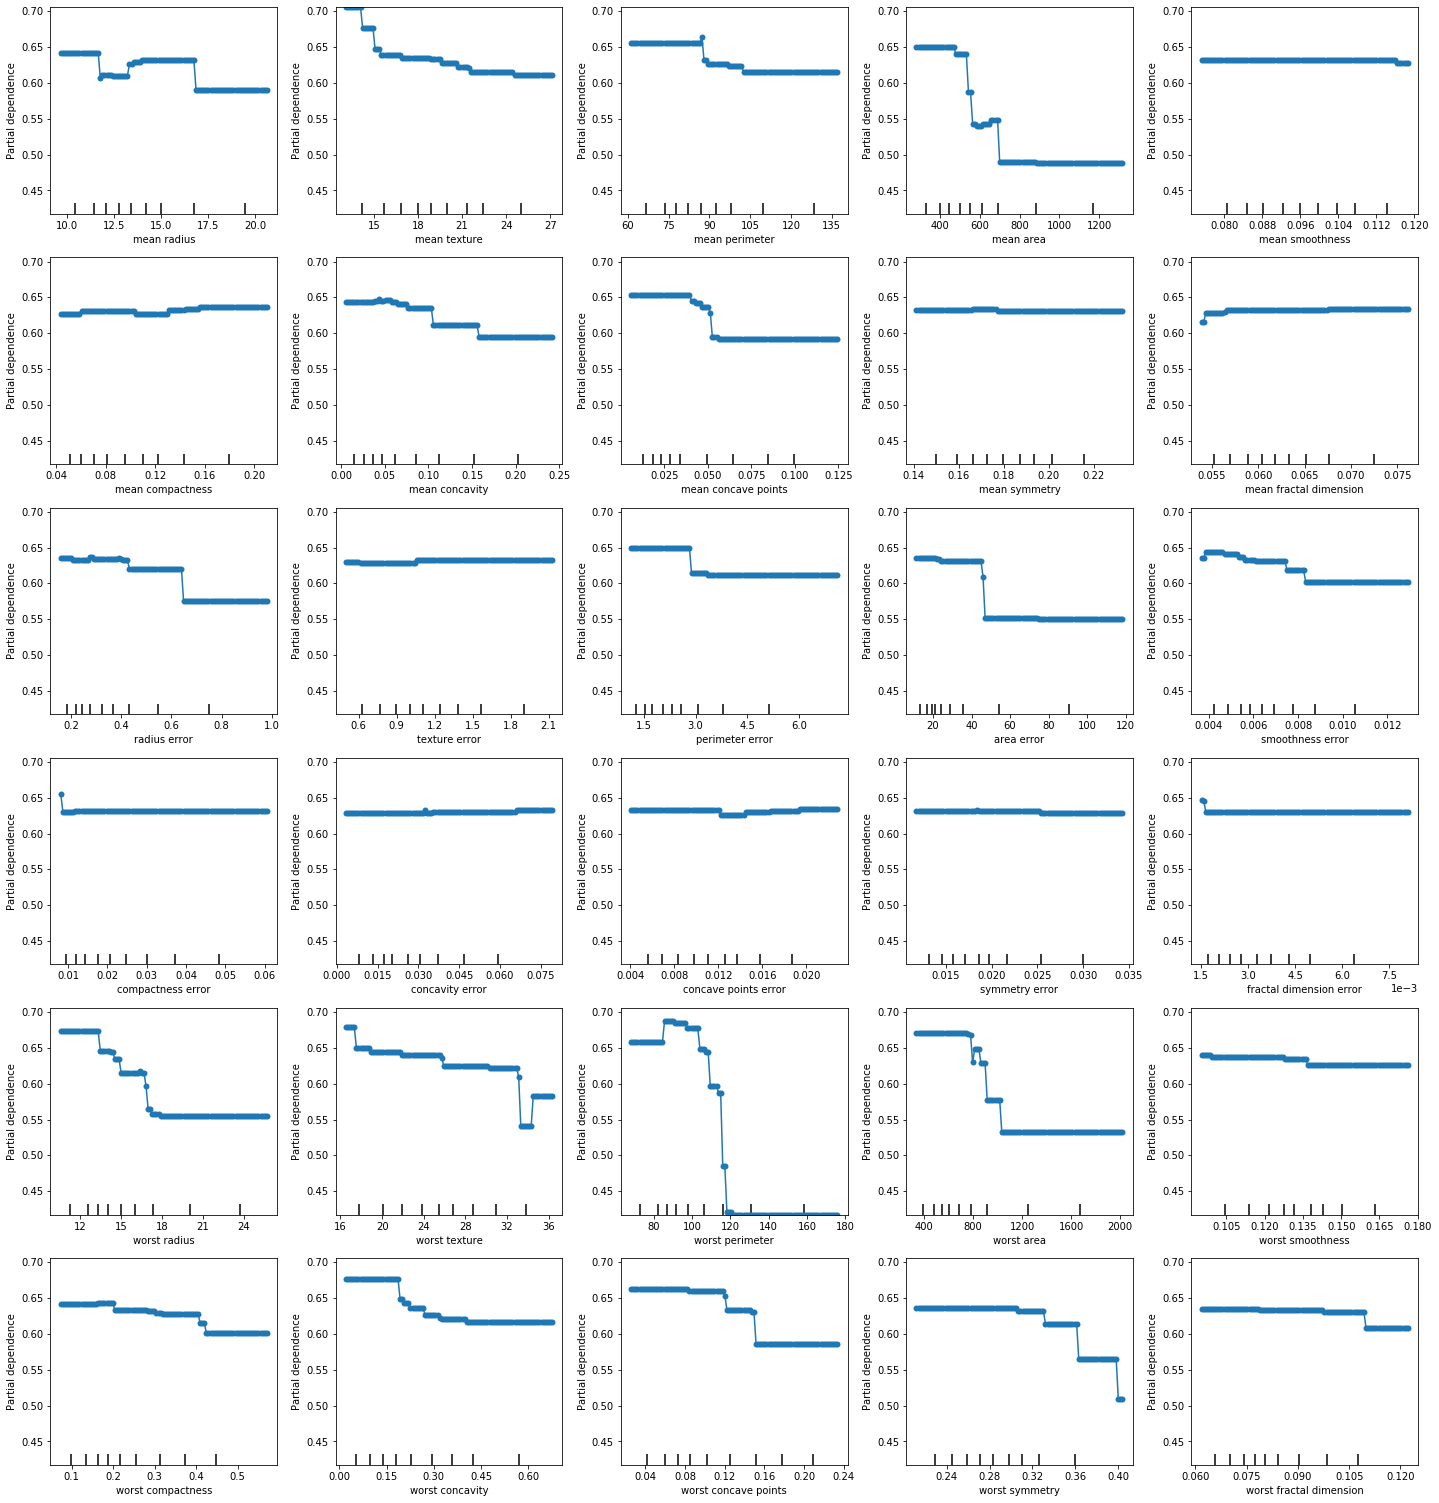

In [465]:
#Partial dependence plot
n_cols = 5
n_rows = feature_names.shape[0]//n_cols + 1

fig = plt.figure(figsize=(20, 3*n_rows))
pdp(RF, X_train, features=feature_names, feature_names=feature_names,
    n_cols=n_cols, fig=fig, line_kw={'marker': 'o', 'markeredgecolor': 'None'})

plt.tight_layout(rect=[0, 0, 1, 1])

### Low levels of mean area, worst radius, worst perimeter and worst area have high probabilities of detecting signs of breast cancer. The higher the values of the aforementioned, the less chance they have of detecting signs of breast cancer. The rest have relatively lower impacts on predicting breast cancer.

In [466]:
perm = eli5.sklearn.PermutationImportance(RF).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=feature_names)

Weight,Feature
0.0474 ± 0.0344,worst perimeter
0.0175 ± 0.0111,mean texture
0.0140 ± 0.0140,worst radius
0.0123 ± 0.0086,worst area
0.0105 ± 0.0131,mean area
0.0070 ± 0.0131,smoothness error
0.0053 ± 0.0140,worst texture
0.0053 ± 0.0086,area error
0.0053 ± 0.0086,radius error
0.0035 ± 0.0086,worst concavity


### Worst perimeter, mean texture, worst radius and worst area are the top relevant features. 

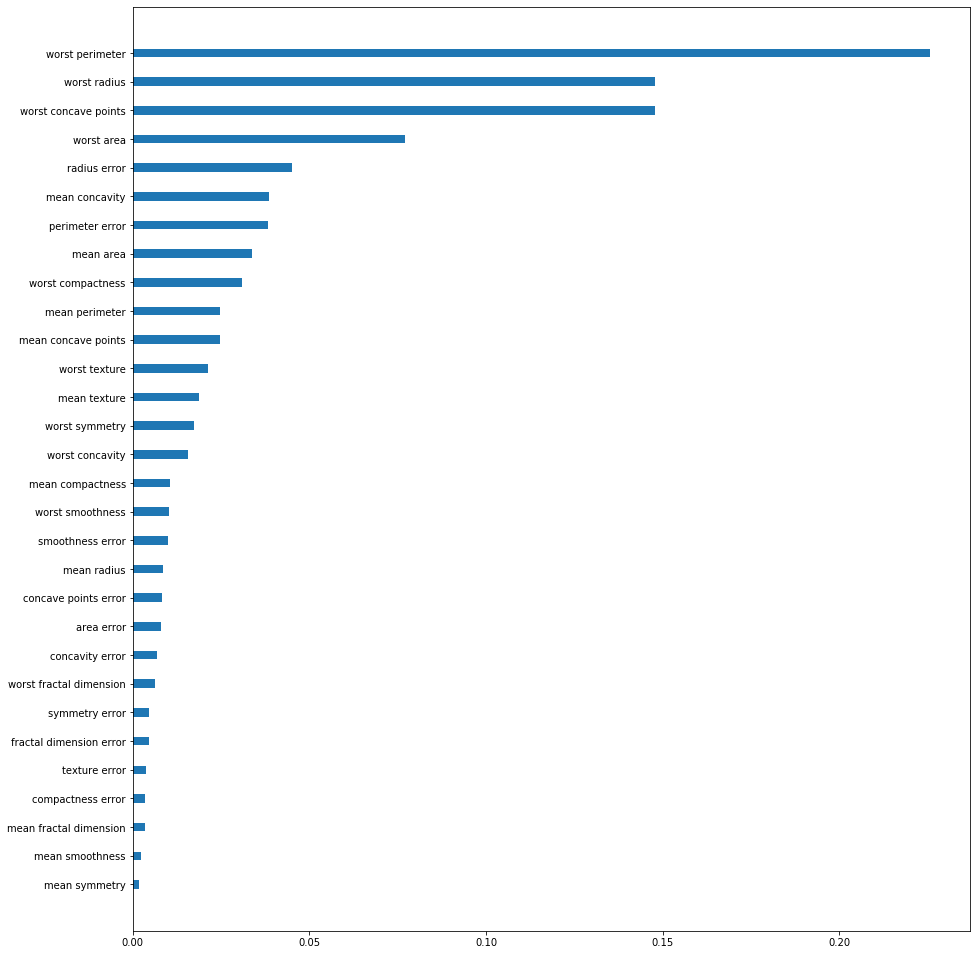

In [467]:
#Random Forest Model fits best
# visualize variable importance
VI = RF.feature_importances_
VI_sort_idx = np.argsort(VI) # sort in increasing order

plt.figure(figsize=(15,17))
plt.barh(range(VI.shape[0]), VI[VI_sort_idx], tick_label=feature_names[VI_sort_idx], height=0.3)
plt.show()

In [546]:
import shap
shap.initjs()

In [547]:
# define the explainer
explainer = shap.TreeExplainer(RF)
# calculate the shape value on training data
# set approximate=True for fast processing
shap_values = explainer.shap_values(X_train, approximate=True)

In [548]:
# force_plot for first 200 trainning samples
shap.force_plot(explainer.expected_value[1], shap_values[1][:200], X_train[:200], feature_names=feature_names)

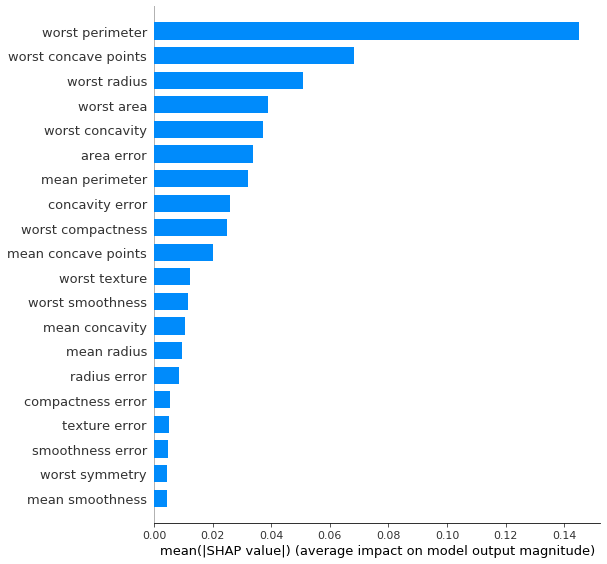

In [549]:
#Supporting plot
shap.summary_plot(shap_values[1], X_train, plot_type="bar",feature_names=feature_names)

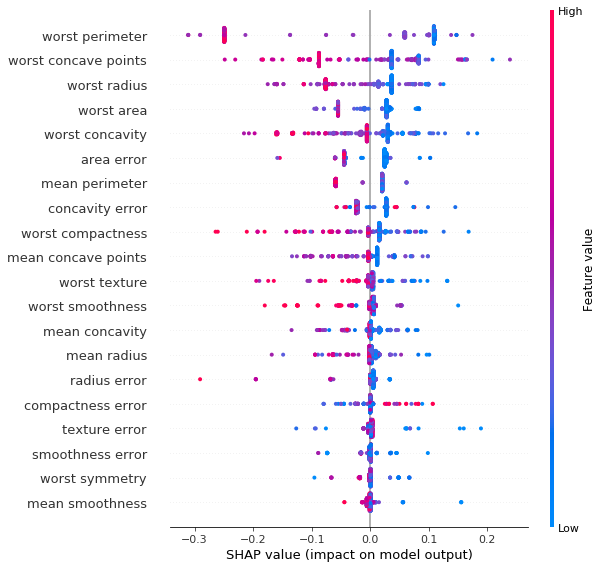

In [550]:
# Supporting plot 2
shap.summary_plot(shap_values[1], X_train,feature_names)

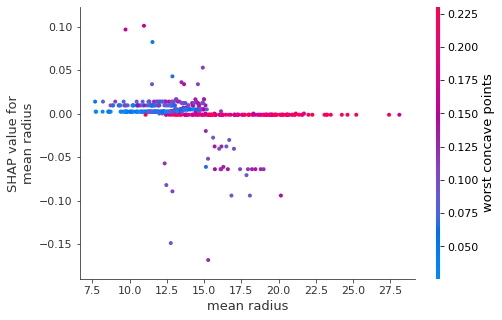

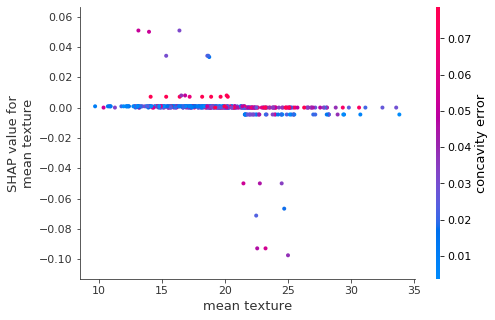

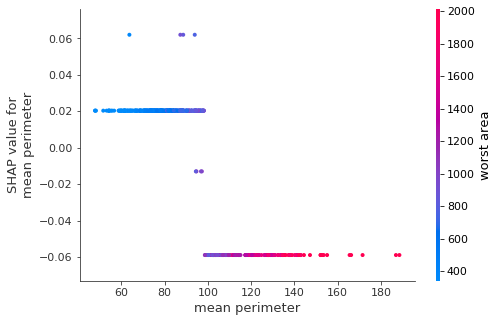

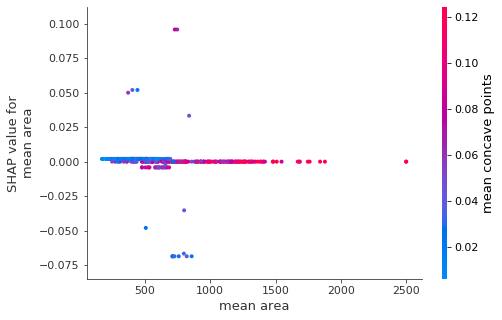

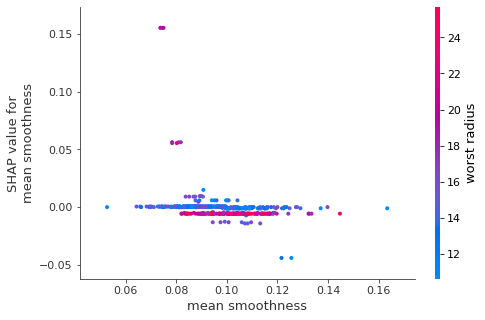

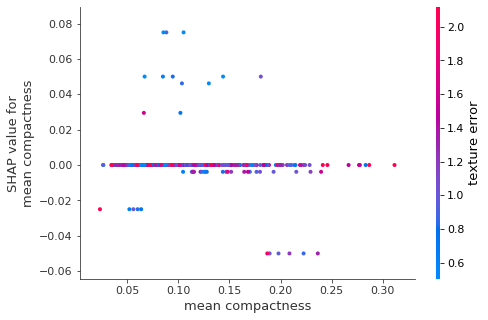

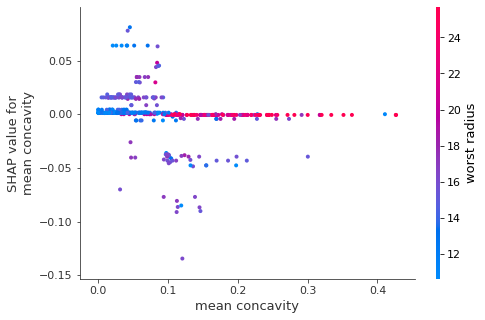

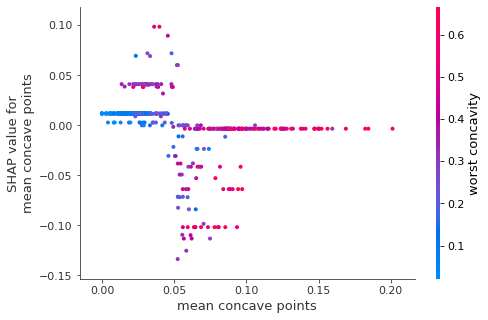

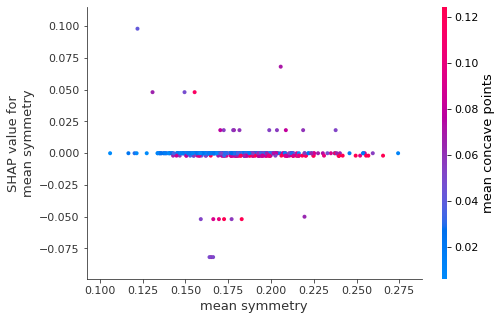

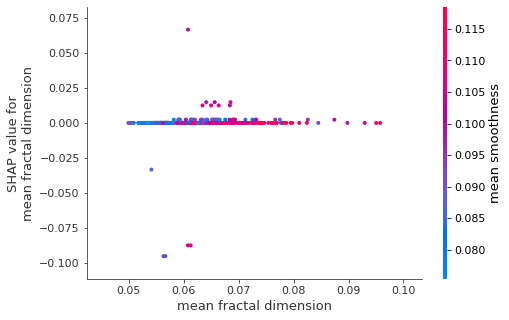

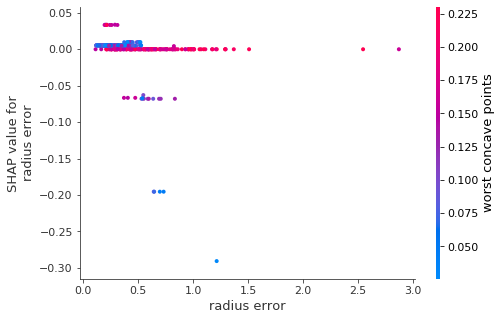

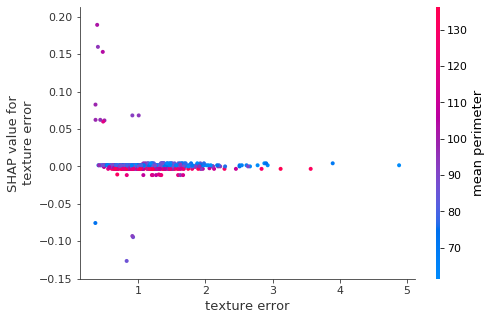

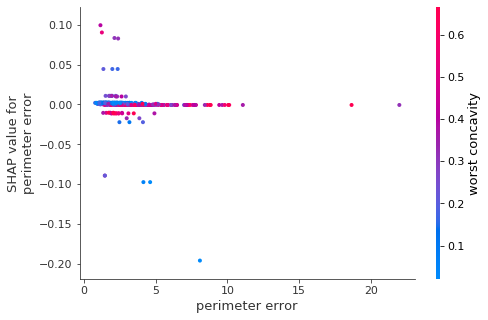

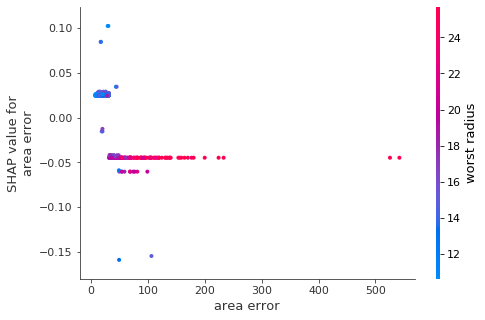

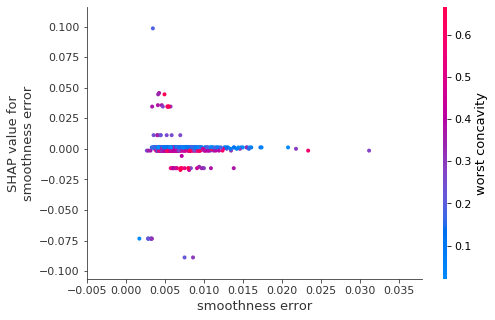

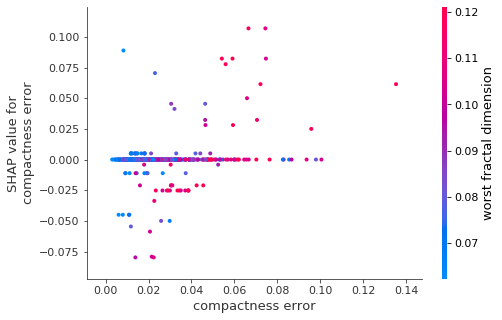

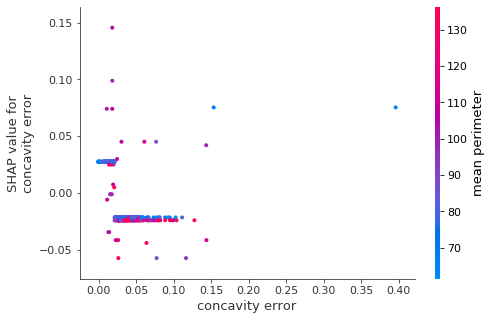

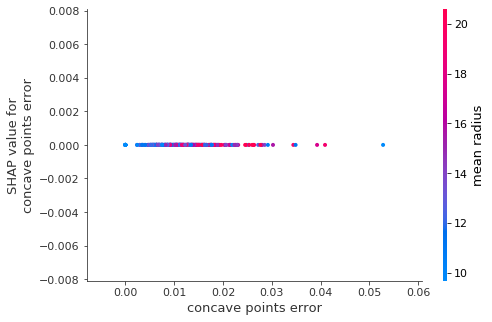

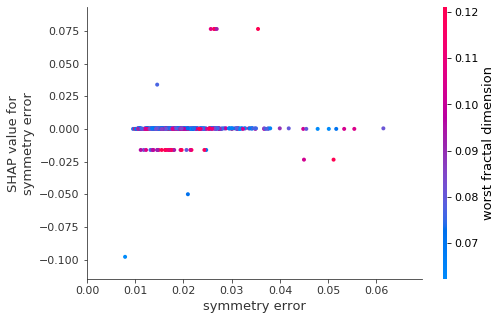

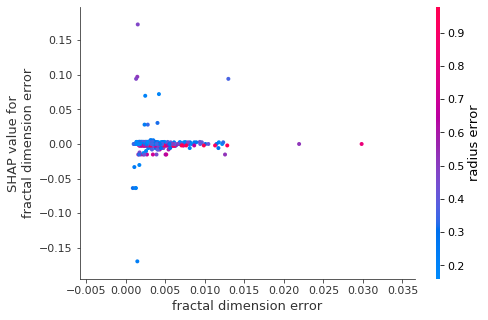

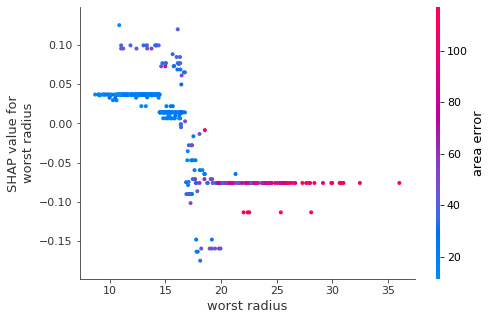

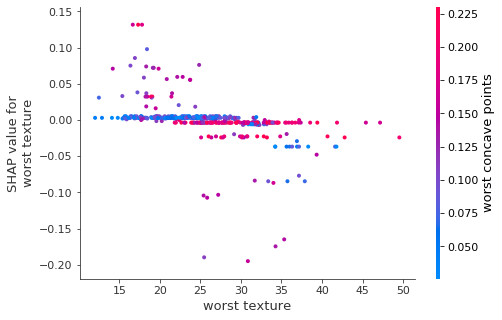

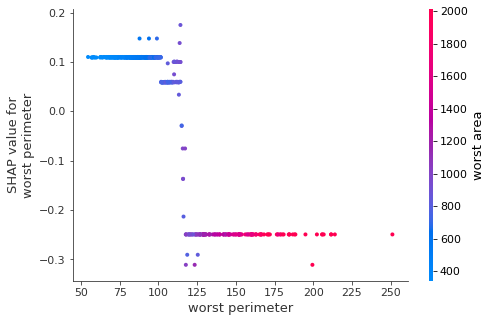

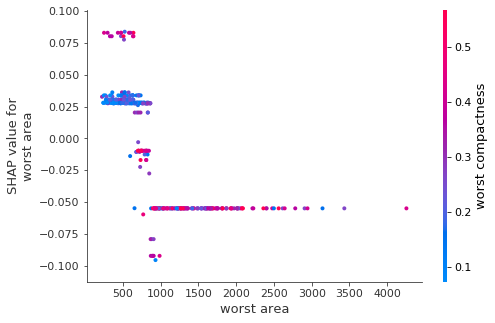

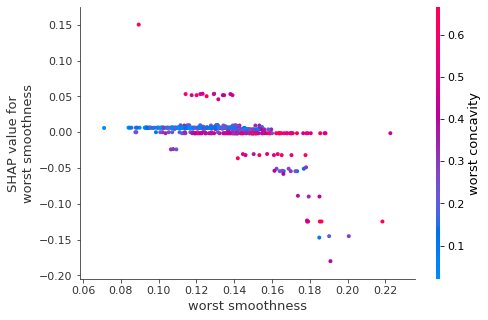

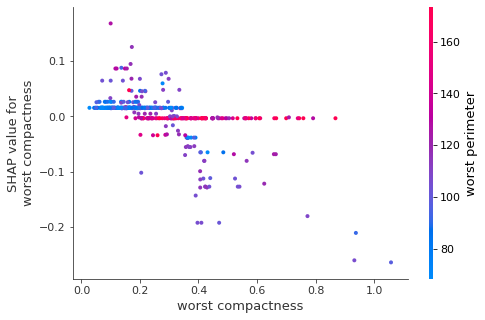

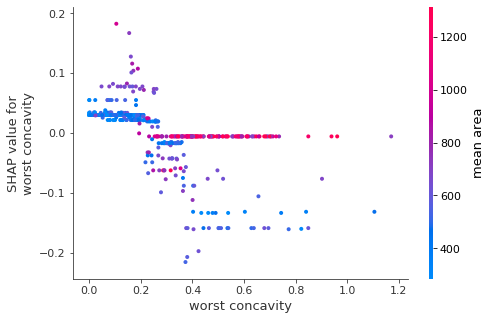

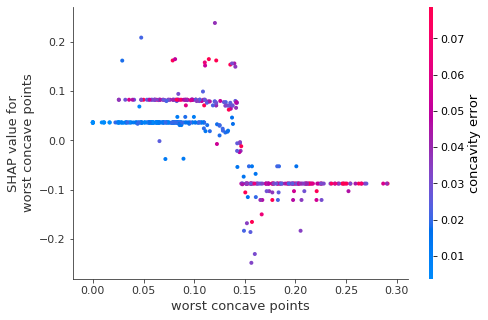

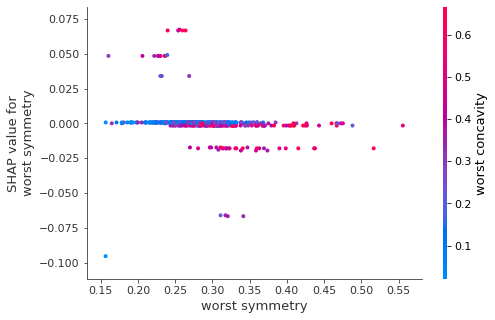

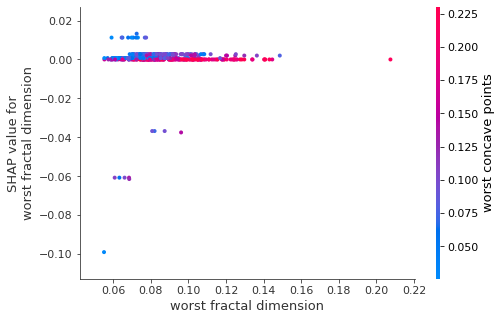

In [551]:
for i, feature_name in enumerate(feature_names):
    shap.dependence_plot(
        i, shap_values[1], X_train, feature_names=feature_names)

### The four set of figures from SHAP above show that worst radius, worst concave points, worst perimeter and radius error have high probabilities of detecting signs of breast cancer. The higher the values of the aforementioned, the less chance they have of detecting signs of breast cancer. The rest have relatively lower impacts on predicting breast cancer. The last figure set also supports the observation that most of the samples show negatively correlated effects on the model. The conclusions drawn from SHAP is consistent with the conclusions of the variable importance figure and the partial dependency plots.

### Worst radius, worst perimeter and worst area seem to hold the most consistency among the results as an overall analysis. All three have negatively correlated effects on the model. 